In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/new_train_sample.csv")
df.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [ ]:
df.shape

(4758418, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

In [25]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 50])  # Show columns >50% missing

MitreTechniques      57.437913
ActionGrouped        99.407093
ActionGranular       99.407093
EmailClusterId       98.987542
ThreatFamily         99.214445
ResourceType         99.925290
Roles                97.702997
AntispamDirection    98.138625
SuspicionLevel       84.842168
LastVerdict          76.542687
dtype: float64


In [26]:
df.drop(["Unnamed: 0","MitreTechniques","ActionGrouped","ActionGranular","EmailClusterId","ThreatFamily","ResourceType","Roles","AntispamDirection","SuspicionLevel","LastVerdict"], axis =1 , inplace = True)


In [ ]:

df.isnull().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,25775
EntityType,0


In [27]:

df["IncidentGrade"].fillna(df["IncidentGrade"].mode()[0],inplace=True)

<ipython-input-27-a6e4e701675c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["IncidentGrade"].fillna(df["IncidentGrade"].mode()[0],inplace=True)


In [28]:
df.duplicated().sum()

156194

In [29]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(4602224, 35)

In [30]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')


In [31]:
df["Day"]=df["Timestamp"].dt.day
df["Month"]=df["Timestamp"].dt.month
df["Year"]=df["Timestamp"].dt.year
df["Hour"]=df["Timestamp"].dt.hour
df["Time"]=df["Timestamp"].dt.time

In [32]:
df = df.drop(columns=['Timestamp'])

In [ ]:
df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,...,5,66,242,1445,10630,6,6,2024,5,05:56:47
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,...,5,66,242,1445,10630,3,6,2024,10,10:45:09
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,...,5,66,242,1445,10630,13,6,2024,3,03:36:40
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,...,5,66,242,1445,10630,8,6,2024,16,16:54:57
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,...,5,66,242,1445,10630,9,6,2024,2,02:48:01


#Data visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


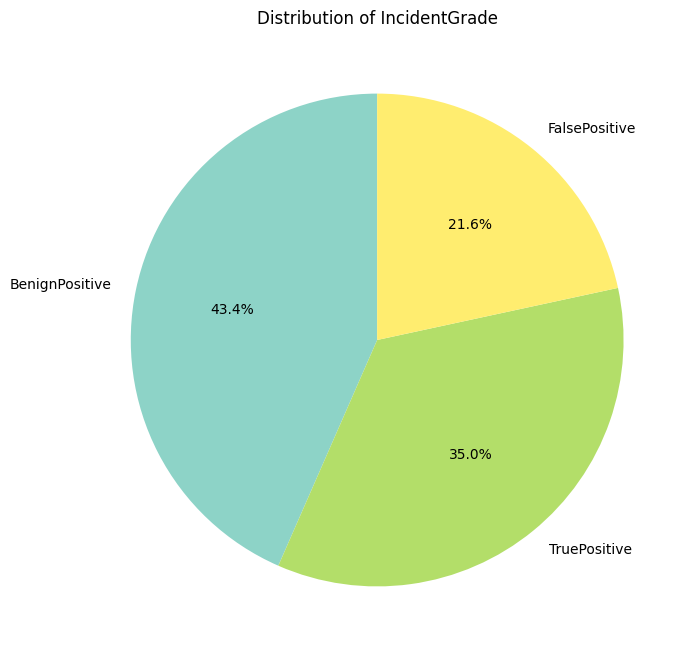

In [ ]:

# Pie chart for 'IncidentGrade'
incident_grade_counts = df['IncidentGrade'].value_counts()
plt.figure(figsize=(8, 8))
incident_grade_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of IncidentGrade')
plt.ylabel('')
plt.show()

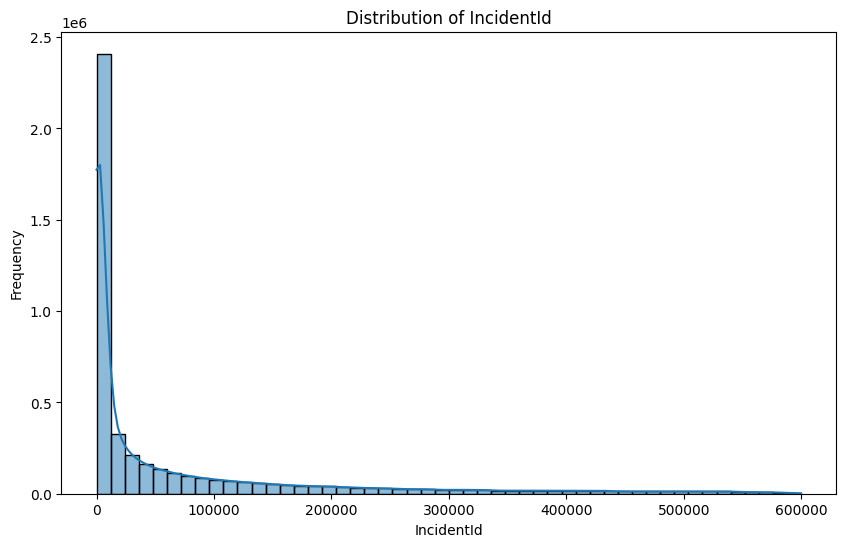

In [ ]:
# Visualizing distribution of a column (e.g., 'IncidentId')
plt.figure(figsize=(10, 6))
sns.histplot(df['IncidentId'], kde=True, bins=50)
plt.title('Distribution of IncidentId')
plt.xlabel('IncidentId')
plt.ylabel('Frequency')
plt.show()


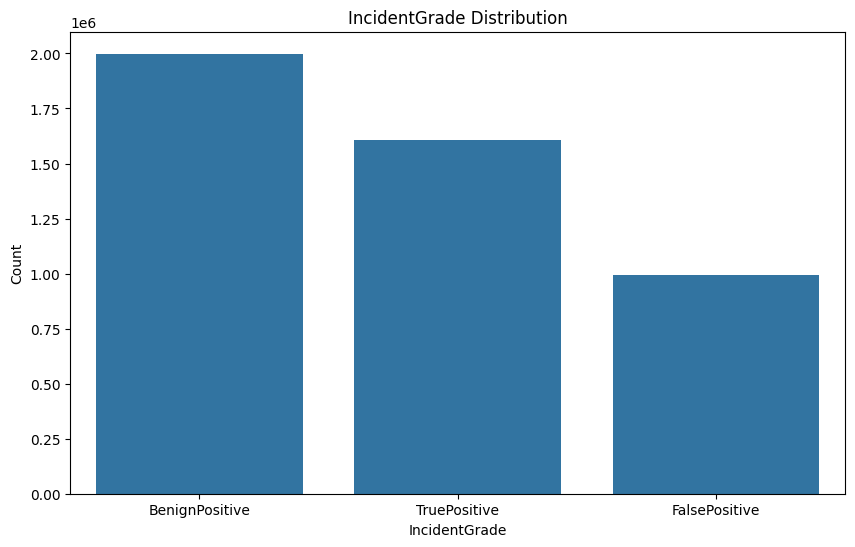

In [ ]:
# Count plot for categorical column (e.g., 'IncidentGrade')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='IncidentGrade')
plt.title('IncidentGrade Distribution')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

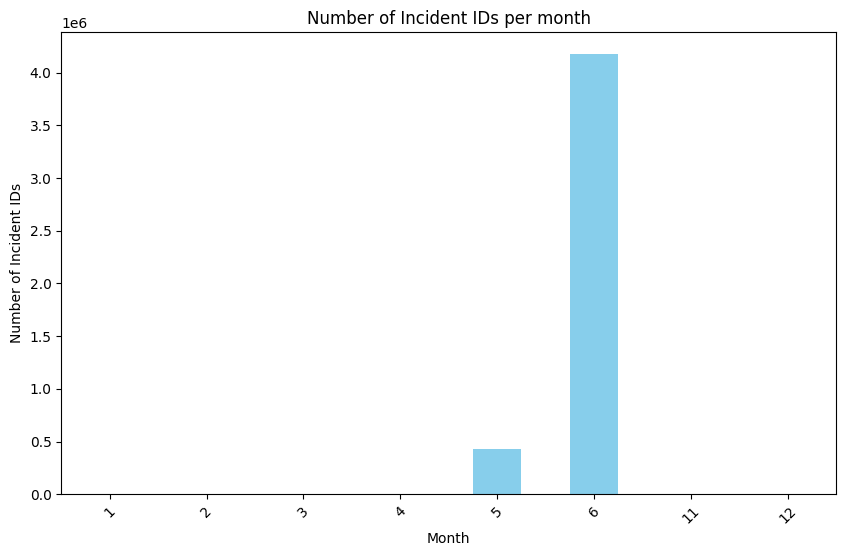

In [ ]:
# Grouping data to count the number of IncidentIds per Year
yearly_incident_counts = df.groupby('Month')['IncidentId'].count()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
yearly_incident_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Incident IDs per month')
plt.xlabel('Month')
plt.ylabel('Number of Incident IDs')
plt.xticks(rotation=45)
plt.show()


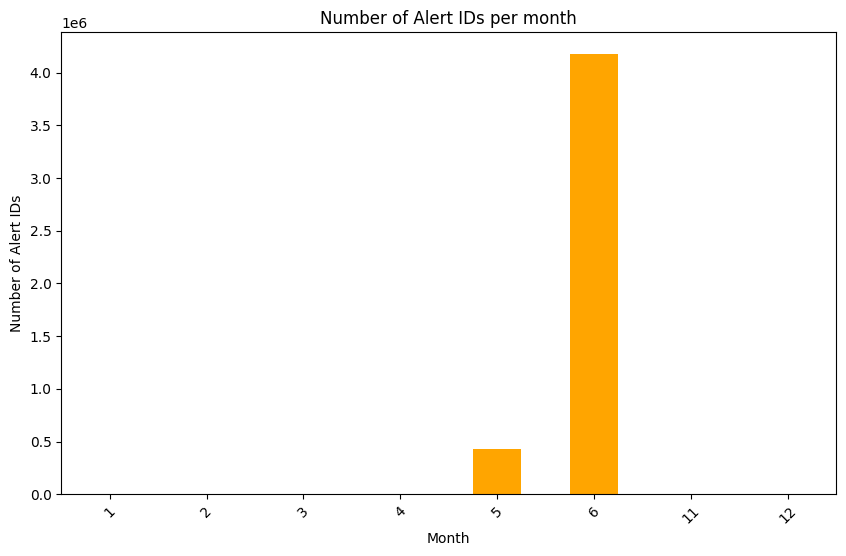

In [ ]:
# Grouping data to count the number of AlertIds per Year
yearly_alert_counts = df.groupby('Month')['AlertId'].count()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
yearly_alert_counts.plot(kind='bar', color='orange')
plt.title('Number of Alert IDs per month')
plt.xlabel('Month')
plt.ylabel('Number of Alert IDs')
plt.xticks(rotation=45)
plt.show()


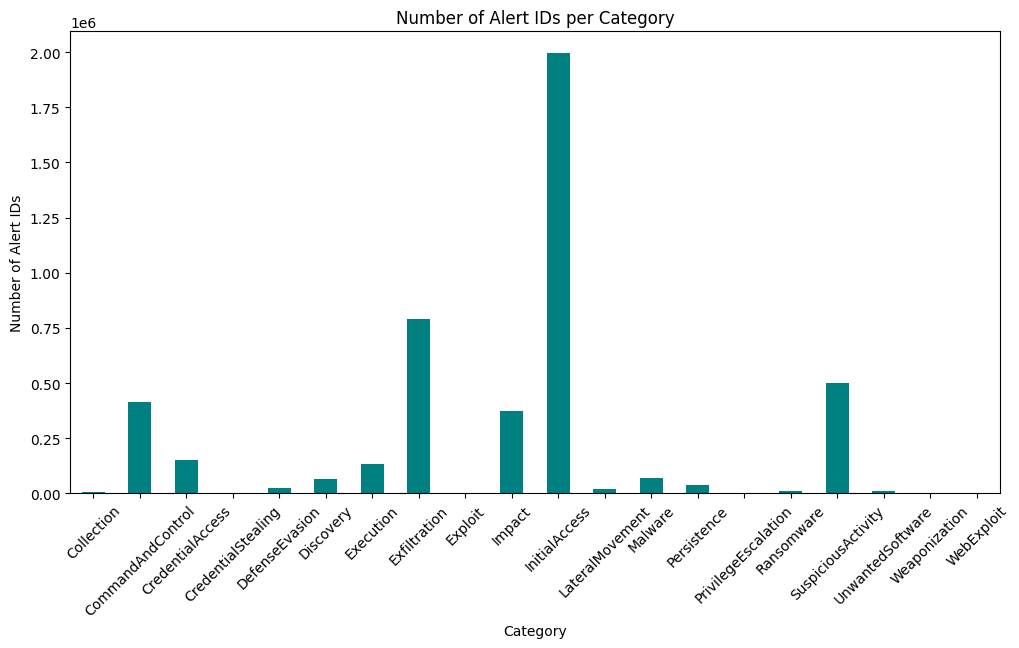

In [ ]:
# Grouping data to count the number of AlertIds per Category
category_alert_counts = df.groupby('Category')['AlertId'].count()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
category_alert_counts.plot(kind='bar', color='teal')
plt.title('Number of Alert IDs per Category')
plt.xlabel('Category')
plt.ylabel('Number of Alert IDs')
plt.xticks(rotation=45)
plt.show()


#encoding

In [ ]:
df.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Category','EntityType','IncidentGrade','EvidenceRole','State','City','DeviceName','AccountName',
       'Time']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)

In [ ]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [34]:
df.drop(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId','DeviceId','FolderPath','FileName','AccountObjectId','IpAddress','Sha256','Url','NetworkMessageId','OAuthApplicationId','ApplicationId'], axis =1 , inplace = True)

              Feature  Importance
0          AlertTitle    0.328907
22               Time    0.245947
18                Day    0.097324
1            Category    0.068657
5          AccountUpn    0.060104
4          AccountSid    0.054475
15        CountryCode    0.027253
7          DeviceName    0.027077
2          EntityType    0.026595
6         AccountName    0.024243
21               Hour    0.019863
17               City    0.008003
3        EvidenceRole    0.004047
16              State    0.003023
11    ApplicationName    0.001377
19              Month    0.001342
14          OSVersion    0.000569
12     ResourceIdName    0.000484
13           OSFamily    0.000335
8         RegistryKey    0.000183
10  RegistryValueData    0.000105
9   RegistryValueName    0.000078
20               Year    0.000009


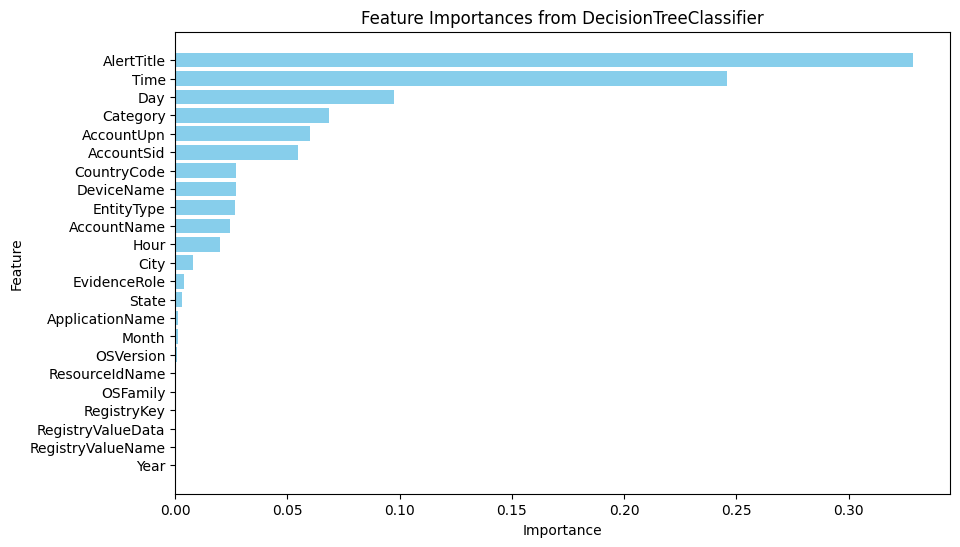

In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Separate features (X) and target (y)
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from DecisionTreeClassifier')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()

In [37]:
df.drop(['Month','ApplicationName','OSVersion','RegistryKey','ResourceIdName','OSFamily','RegistryValueName','RegistryValueData','Year'], axis =1 , inplace = True)

#balancing data

In [ ]:
! pip install -U imbalanced-learn


In [38]:
X = df.drop('IncidentGrade', axis=1)  # Features
y = df['IncidentGrade']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [42]:
y_resampled.value_counts()

,count
IncidentGrade,
0,994500
1,994500
2,994500


#model training

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
     'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'splitter': 'best'}


In [44]:
models = {
     'Decision Tree': DecisionTreeClassifier(max_depth=5, max_features='sqrt',random_state=42),
    'XGBoost': XGBClassifier(n_jobs=-1, random_state=42),
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for model_name, model in models.items():
    print(f'Model: {model_name}')

    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test)

    # Evaluateing the models
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Displaying the results of the modles
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(report)
    print('-' * 50)

Model: Decision Tree
Accuracy: 0.5986843320350482
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68    399779
           1       0.36      0.36      0.36    199133
           2       0.79      0.54      0.64    321533

    accuracy                           0.60    920445
   macro avg       0.59      0.55      0.56    920445
weighted avg       0.62      0.60      0.60    920445

--------------------------------------------------
Model: XGBoost
Accuracy: 0.7658589052034613
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80    399779
           1       0.65      0.67      0.66    199133
           2       0.86      0.74      0.79    321533

    accuracy                           0.77    920445
   macro avg       0.76      0.75      0.75    920445
weighted avg       0.77      0.77      0.77    920445

-----------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.46298692480267695
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.32      0.41    399779
           1       0.29      0.17      0.22    199133
           2       0.45      0.82      0.58    321533

    accuracy                           0.46    920445
   macro avg       0.44      0.44      0.40    920445
weighted avg       0.48      0.46      0.43    920445

--------------------------------------------------
